## Z-Projection

We start off with projecting our measured point onto the conic along the  𝑍 -axis. This requires us to calculate the  𝑍  coordinate from  𝑋  and  𝑌 .



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
x,y,z,x0,y0,z0,d = sp.symbols('x,y,z,X_{0} Y_{0} Z_{0} \delta', real=True)

$conz$ will be our function for the $Z$ value of our conic evaluated at a distance $\rho=\sqrt{X^2+Y^2}$ from the origin on the $XY$-plane (we similarly define $\rho_0=\sqrt{X_0^2+Y_0^2}$). The symmetry of the conic allows us to use $\rho$ instead of $X$ and $Y$ individually.

In [3]:
k,R = sp.symbols('k R', real=True)
rho, rho0 = sp.symbols('\\rho \\rho_{0}', real=True, positive=True)
c=1/R

In [4]:
conz = (c*rho**2) / (1 + sp.sqrt(1-(1+k)*c**2*rho**2))

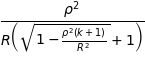

In [5]:
conz

We can now calculate $d_{Z_0}$, which we define as the $Z$ distance between our point and the conic, by evaluating $Z_0 - conz(\rho_0)$ but this distance overestimates the distance between the point and the conic. What we want to do in addition is linearize the conic at the $Z$ projection point and then calculate the distance to the plane representing this linearization. 

To linearize we need the gradient (slope) of the conic at our evaluation point, which is just $\frac{d conz}{d\rho}$ again because of symmetry, so the problem is effectively two dimensional:

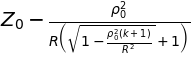

In [6]:
dz0 = z0-conz.subs(rho,rho0)
dz0

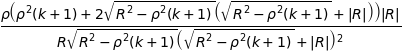

In [7]:
slope = sp.simplify(sp.diff(conz, rho))
slope

To find our minimum distance $d_{min}$ to the linearized plane, we must find the length of the normal vector running from the plane to the point. 

To do this, we can imagine a triangle formed by the slope we just calculated as $\frac{rise}{run}$ such that we have our "rise" of $slope(\rho)$ when our "run" is $1$. This triangle is geometrically similar to the triangle formed by the $Z$ projection distance from the point to the conic, the normal vector that runs from the linearized plane to the point (which is the minimum distance from the point to the plane), and the line connecting these two that runs along the linearized plane. This gives us a ratio equation involving $d_{min}$:

$$\frac{\sqrt{slope^2 + 1}}{1} = \frac{d_Z}{d_{min}},$$

yielding: 

$$d_{min} = \frac{d_Z}{\sqrt{slope^2+1}}.$$

We can think of this as a scale factor $S$ that we apply to $d_Z$:

$$S(\rho) = \frac{1}{\sqrt{slope(\rho)^2+1}},$$

such that finally:

$$d_{min}(\rho) = S(\rho) d_Z(\rho).$$

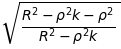

In [8]:
S = sp.symbols('S')
S=sp.simplify(sp.sqrt(sp.factor(sp.simplify(1 / (slope**2+1)))))
S

$$S = \sqrt{\frac{R^2-\rho^2(k+1)}{R^2-\rho^2k}}$$

We can now generate an expression for the minimum distance from an arbitrary point $p_0$ = $[\rho_0,Z_0]$ to the conic:

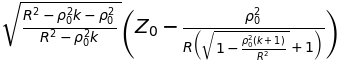

In [9]:
dmin0 = (S.subs(rho,rho0)*dz0)
dmin0

We'd like a way to understand how good our approximation is. We can choose an arbitrary point on the conic, displace it by a known amount $\delta$ along the local surface normal, and then see what we calculate as the distance given our approximation. To displace our points we need to calculate the normal vector to the surface of the conic at any point:

In [10]:
conconst = z-conz
norm = sp.simplify(sp.Matrix([sp.diff(conconst, rho), sp.diff(conconst,z)]))
norm = sp.simplify(norm / norm.norm())
norm

⎡                                                                        -R⋅\r
⎢─────────────────────────────────────────────────────────────────────────────
⎢       ______________________________________________________________________
⎢      ╱                                                       2              
⎢     ╱   4    2     2      2     2 │            R            │     2     2   
⎢    ╱   R  - R ⋅\rho ⋅k + R ⋅\rho ⋅│─────────────────────────│  - R ⋅\rho  - 
⎢   ╱                               │   ______________________│               
⎢  ╱                                │  ╱  2       2         2 │               
⎢╲╱                                 │╲╱  R  - \rho ⋅k - \rho  │               
⎢                                                                             
⎢                                                                         │R│ 
⎢                                                   ──────────────────────────
⎢                                                   

We also need a way to write our arbitrary point $p$:

In [11]:
conic_point = sp.Matrix([rho, conz])
conic_point

⎡              \rho               ⎤
⎢                                 ⎥
⎢                  2              ⎥
⎢              \rho               ⎥
⎢─────────────────────────────────⎥
⎢  ⎛      ___________________    ⎞⎥
⎢  ⎜     ╱         2             ⎟⎥
⎢  ⎜    ╱      \rho ⋅(k + 1)     ⎟⎥
⎢R⋅⎜   ╱   1 - ─────────────  + 1⎟⎥
⎢  ⎜  ╱               2          ⎟⎥
⎣  ⎝╲╱               R           ⎠⎦

And we can now displace our point $p$ a distance $\delta$ along the local normal:

In [12]:
disp_point = conic_point + d*norm
disp_point

⎡                                                                       R⋅\del
⎢- ───────────────────────────────────────────────────────────────────────────
⎢         ____________________________________________________________________
⎢        ╱                                                       2            
⎢       ╱   4    2     2      2     2 │            R            │     2     2 
⎢      ╱   R  - R ⋅\rho ⋅k + R ⋅\rho ⋅│─────────────────────────│  - R ⋅\rho  
⎢     ╱                               │   ______________________│             
⎢    ╱                                │  ╱  2       2         2 │             
⎢  ╲╱                                 │╲╱  R  - \rho ⋅k - \rho  │             
⎢                                                                             
⎢                                                                             
⎢                                                         \delta⋅│R│          
⎢                                      ─────────────

We now run this displaced point through our formula:

In [13]:
ddist = sp.simplify(dmin0.subs(rho0, disp_point[0]).subs(z0, disp_point[1]))

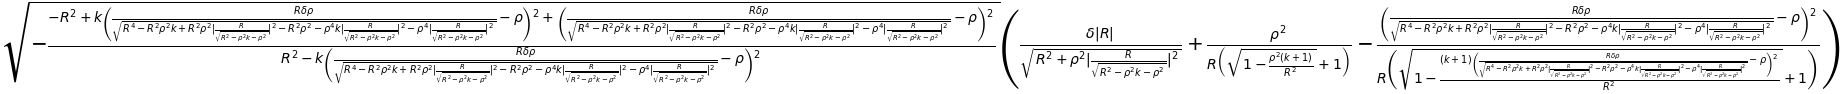

In [14]:
ddist

In [15]:
def numeric(val, Rval=100, kval=-.1, rval=50, dval=.1):
    return sp.N(val.subs(R, Rval).subs(rho,rval).subs(k,kval).subs(d,dval))

In [16]:
def pcterreval(val, Rval=100, kval=-.1, rval=50, dval=.1):
    return 100*(numeric(val) - dval)/dval

In [17]:
pcterreval(ddist)

We can use the above to evaluate at various points and test our error. 

We can also look at the derivatives of this function:

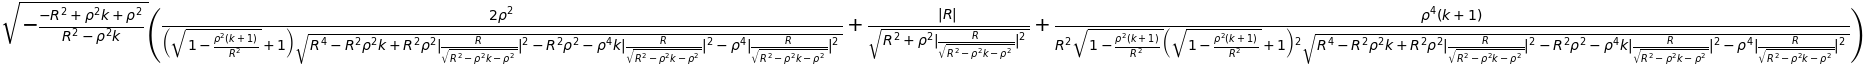

In [18]:
ddist_deriv = sp.diff(ddist, d).subs(d,0)
ddist_deriv2 = sp.diff(ddist, d,2).subs(d,0)
ddist_deriv

In [19]:
print(numeric(ddist_deriv))
print(numeric(ddist_deriv2))


1.00000000000000
0.00310851171250854


While SymPy will not algebraically reduce the expression for the first derivative, we can see by evaluating it a lots of points that while the expression for the conic is valid (i.e. not imaginary), the first derivative is equal to 1. This implies that we have correctly captured the displacement distance to first order in $\delta$

In [20]:
ddist_deriv2 = sp.diff(ddist, d,2).subs(d,0)


In [21]:
numeric(ddist_deriv2)

In [22]:
test=sp.simplify(ddist_deriv.subs(k,-1))
test

## Uncertainty Propagation
We will assume we are given uncertainties ($\sigma_{X_0}$,$\sigma_{Y_0}$,$\sigma_{Z_0}$). 

We want to calculate $\sigma_{d_{min_0}}$ using these point errors. Because we are using $d_{min_0}$ as an approximation to $\delta$, $\sigma_{d_{min_0}}$ will be an approximation to $\sigma_{\delta}$ and so we will keep terms only to linear order in $\delta$.

Since $X$ and $Y$ only enter through $\rho$ the first step we take is to calculate $\sigma_{\rho}$:

In [23]:
sx0,sy0,sz0 = sp.symbols('\sigma_{X_0} \sigma_{Y_0} \sigma_{Z_0}', real=True)

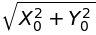

In [24]:
rho_ = sp.sqrt(x0**2+y0**2)
rho_

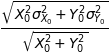

In [25]:
sr = sp.simplify(sp.sqrt(sp.diff(rho_,x0)**2*sx0**2 + sp.diff(rho_,y0)**2*sy0**2))
sr

So that $\sigma_{\rho_0}$ is sensibly:

$$\frac{\sqrt{X_0^2 \sigma_{X_0}^2 + Y_0^2 \sigma_{Y_0}^2}}{\rho_0}$$

To compute $\sigma_{d_{min}}$ we can write:

$$\sigma_{d_{min}} = \Bigg( \bigg(\frac{\partial d_{min}}{\partial Z_0}\bigg)^2 \sigma_{Z_0}^2 + \bigg(\frac{\partial d_{min}}{\partial \rho_0} \bigg)^2 \sigma_{\rho_0}^2 \Bigg)^{\frac{1}{2}} $$

so we can look at the two derivatives individually, remembering that $d_{min}(\rho) = S(\rho) d_Z(\rho) = S(\rho) (Z_0 - conz(\rho))$.

It is clear that:

$$\frac{\partial d_{min}}{\partial Z_0} = S,$$

and that 

$$\frac{\partial d_{min}}{\partial \rho_0} = \frac{\partial S}{\partial \rho_0} d_{Z_0} - \frac{\partial conz}{\partial \rho_0} S.$$

We argue that we know $\frac{\partial S}{\partial \rho}$ does not enter at linear order in $\delta$ because it corresponds to shifting which plane we are using for our linerization, and we have seen that a single linerization is exact to first order in $\delta$. It would be nice to firm this up a bit.

So we are left with:

$$\frac{\partial d_{min}}{\partial \rho_0} = - \frac{\partial conz}{\partial \rho_0} S.$$

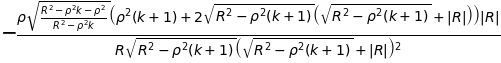

In [31]:
ddmindrho = (-slope*S)
ddmindrho

## Computational Steps

Since we want to compute the above expressions many times, we want to find an efficient way of doing so. 

We need to compute $conz$ and $S$ to evaluate $d_{min}$ and we need to compute $S$ and $\frac{\partial d_{min}}{\partial \rho_0}$ (as a SymPy variable $ddmindrho$) to propagate the uncertainty.


We could start by collecting a bunch of small pieces that are used many times:


$$(k+1)$$